In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from geometry import *
import material
import cross_section
import beam_element
import structure
import solver

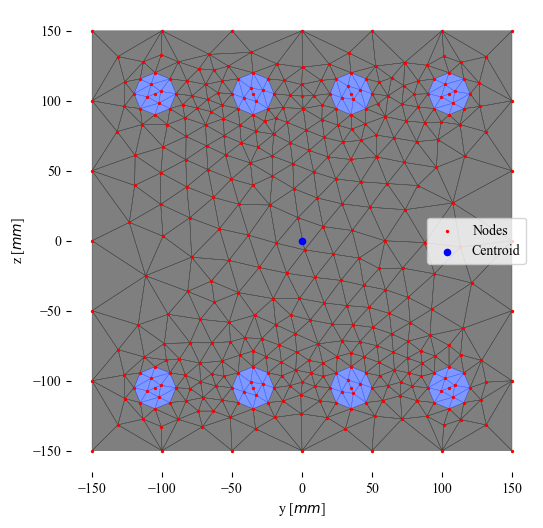

In [2]:
ReinforcedConcrete = ReinforcedConcreteColumn(width  = 300, 
                                                       height = 300, 
                                                       concrete_cover = 30,
                                                       rebar_diameter = 30,
                                                       rebar_spacing  = 50)
mesh = Mesh(ReinforcedConcrete, "triangle", 50)
mesh.plot()

In [3]:
struc = structure.Cantilever(beam   = mesh, 
						length = 2000, 
						number_of_sections_per_elemnt = 6)

In [4]:
non_linear_solver = solver.Nonlinear(struc, 
									 constraint="Load", 
									 NR_tolerance=1e-4, 
									 NR_max_iter=20, 
									 section_tolerance=1e-6, 
									 section_max_iter=100)

In [5]:
increments = np.zeros(32)
increments.fill(5000)

u_history , lambda_history  = non_linear_solver.solve(increments)

  0%|          | 0/32 [00:00<?, ?it/s]

----------------------------------------------
Load step 1 of 32
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
            Element iteration  1
            Element iteration  2
            Element iteration  3
            Element iteration  4
            Element iteration  5
            Element iteration  6
            Element iteration  7
            Element iteration  8
            Element iteration  9
            Element iteration  10
            Element iteration  11
            Element iteration  12
            Element iteration  13
            Element iteration  14
            Element iteration  15
            Element iteration  16
            Element iteration  17
            Element iteration  18
            Element iteration  19
            Element iteration  20
      Residuals Norm  998085.8886916857
      NR Iteration  1
         Beam Element  1
            Element iteration  0
            Element iteration  1
            Eleme

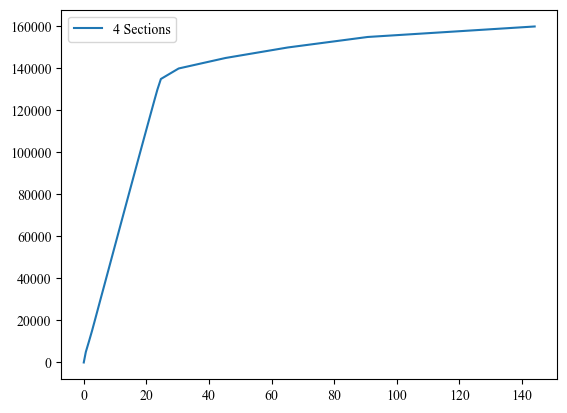

In [ ]:
plt.plot(u_history[:,6+2], lambda_history, label="4 Sections")
plt.legend()
plt.show()